# Basic Libraries

In [1]:

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

import math
import random

from qiskit.providers.aer.noise import NoiseModel
from qiskit.aqua import QuantumInstance
from qiskit.providers.aer.noise import thermal_relaxation_error, ReadoutError, depolarizing_error

# provider = IBMQ.get_provider(hub='ibm-q')
# machine = provider.get_backend('ibmq_valencia')
from qiskit.test.mock import FakeBogota
machine = FakeBogota()
machine_noise_model = NoiseModel.from_backend(machine)
simulator = Aer.get_backend('qasm_simulator')


basis_gates = machine_noise_model.basis_gates

C:\Users\Eesh Gupta\anacondaaa\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


# Important Functions

In [2]:
#Local Hamiltonian Function
from VQEHamiltonian_funcs import Hammifier

# Expectation Value/Running Functions
from Result_funcs import binaryToDecimal, dictToList, sampleExpecVal, countToEig, expecValForSamples, addDicts, evaluator

In [3]:
machine

<FakeBogota('fake_bogota') from None()>

# Noise Model

In [4]:
'''

def generateDepolarizingError(machine, gate, qubits)

def generateRelaxationError(machine, gate, qubits, t1, t2, amp = 1, custom_t = False):
    """
    Return a relaxation error
    """

def generateNoiseModel(machine, coherent = True, incoherent = False, readout = False, custom_t = False, t1 = None, t2 = None, reverse = False):
    """
    Returns a realistic copy of london noise model with custom t1, t2 times
    """

'''

from NoiseModel import generateDepolarizingError, generateRelaxationError, generateNoiseModel

In [5]:
 noise_model = machine_noise_model

# Restricted Range Info

In [6]:
'''------------Interatomic Distance = 0.74--------------
HF energy: -1.831863646477506
# of electrons: 2
# of spin orbitals: 4
Number of qubits are : 2
[ 0.00172129 -0.00182397 -0.11217598]
VQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012
All energies have been calculated'''

'------------Interatomic Distance = 0.74--------------\nHF energy: -1.831863646477506\n# of electrons: 2\n# of spin orbitals: 4\nNumber of qubits are : 2\n[ 0.00172129 -0.00182397 -0.11217598]\nVQE Result: -1.1011690791894007 Exact Energy: -1.1372838344885012\nAll energies have been calculated'

# Variational Form
For Hydrogen

In [7]:
from qiskit.chemistry.components.variational_forms import UCCSD
from qiskit.chemistry.components.initial_states import HartreeFock

initial_state = HartreeFock(
4,
2,
'parity'
) 
var_form = UCCSD(
            num_orbitals=4,
            num_particles=2,
            initial_state=initial_state,
            qubit_mapping='parity'
        )

In [8]:
import numpy as np
def evaluator(circuits, samples, noise_model, Hamiltonian, hammy_weights, simulator):
    """
    Input: circuits, noise model to run on , weights of the local hammys
    Output: expectation value (energy)
    
    """
    
    #Running the circuits 
    results = [[] for i in range(len(circuits))]
  
    
    
    print('here')
    for i_circ in range(len(circuits)):
        circ = circuits[i_circ]
        if(noise_model!=None):
            job =  execute(circ, backend = simulator, noise_model = noise_model, shots = samples)
        else:
            job = execute(circ, backend = simulator, shots = samples)
        counts = job.result().get_counts()
        results[i_circ].append(counts)
    print('here2')
        
    #print('Running Circuits done')
    #adding up all the dicts
    counties = [addDicts(circ_results) for circ_results in results]
    
    #print('Adding dicts done')
    #computing expectation values
    expec_vals = expecValForSamples(counties[0], counties[1], Hamiltonian, hammy_weights)
    #print('Computing expec vals done')
    
    mean = np.mean(expec_vals)
    #std = np.std(expec_vals)
        
    return mean
    

# Running Circuits for different Param

In [9]:
counter = 0

def EnergyFinder(param):
    '''
    Input: param (1D array) for which to compute energy on VQE circ of H2
    Output: energy
    '''
    
    Hamiltonian = """II\nIZ\nZI\nZZ\nXX"""
    Hamiltonian_weights = [-1.053, 0.395, -0.395, -0.011, 0.181]
    backend = simulator
    global noise_model
    samples = 10**4
    
    
    
    circ = var_form.construct_circuit(param).decompose()
    circuits = Hammifier(circ, Hamiltonian)
    noisy = evaluator(circuits, samples, noise_model, Hamiltonian, Hamiltonian_weights, simulator)
    ideal = evaluator(circuits, samples, None, Hamiltonian, Hamiltonian_weights, simulator)
    return noisy, ideal

def main():
    '''
    Choose param and compute mean
    '''
    d = -math.pi
    u = math.pi
    
    energies = []
    plot_data = []
    params = []
    
    [p1,p2] = [ 0.00172129, -0.00182397]
    p3 = -math.pi
    
    for i in range(int((2*math.pi)/0.01)):
        print('---------------------------------')
        print(i)
        p3 = -math.pi + (0.01*i)
        n, ideal = EnergyFinder([p1,p2,p3])
       
        print(ideal)
        print(n)
        energies.append([[p1,p2,p3], ideal, n])
        plot_data.append([p3, ideal, n])
        
    return energies, plot_data
energies, plot_data = main()

---------------------------------
0
here
here2
here
here2
-1.1188866609189183
-0.9702672609189185
---------------------------------
1
here
here2
here
here2
-1.1165698609189185
-0.9755066609189186
---------------------------------
2
here
here2
here
here2
-1.1169548609189186
-0.9717278609189185
---------------------------------
3
here
here2
here
here2
-1.1183960609189183
-0.9712132609189185
---------------------------------
4
here
here2
here
here2
-1.1141504609189186
-0.9698508609189186
---------------------------------
5
here
here2
here
here2
-1.1114908609189185
-0.9712734609189185
---------------------------------
6
here
here2
here
here2
-1.1097562609189184
-0.9669130609189186
---------------------------------
7
here
here2
here
here2
-1.1102132609189184
-0.9669628609189185
---------------------------------
8
here
here2
here
here2
-1.1082072609189182
-0.9645894609189185
---------------------------------
9
here
here2
here
here2
-1.1020636609189183
-0.9630242609189185
--------------------

here2
here
here2
-0.2446342609189187
-0.2292780609189187
---------------------------------
84
here
here2
here
here2
-0.2537480609189187
-0.23205046091891873
---------------------------------
85
here
here2
here
here2
-0.2269476609189187
-0.1994768609189187
---------------------------------
86
here
here2
here
here2
-0.21256186091891868
-0.2015166609189187
---------------------------------
87
here
here2
here
here2
-0.19275706091891867
-0.1839878609189187
---------------------------------
88
here
here2
here
here2
-0.17381326091891866
-0.16709726091891872
---------------------------------
89
here
here2
here
here2
-0.1584242609189187
-0.1515970609189187
---------------------------------
90
here
here2
here
here2
-0.15519946091891865
-0.14687526091891867
---------------------------------
91
here
here2
here
here2
-0.12344446091891868
-0.13569686091891867
---------------------------------
92
here
here2
here
here2
-0.11881646091891866
-0.11166366091891869
---------------------------------
93
here

here2
here
here2
0.4484371390810812
0.3733545390810813
---------------------------------
167
here
here2
here
here2
0.4500657390810812
0.3719373390810812
---------------------------------
168
here
here2
here
here2
0.4448389390810812
0.37034513908108124
---------------------------------
169
here
here2
here
here2
0.4416065390810813
0.3581263390810812
---------------------------------
170
here
here2
here
here2
0.44016453908108116
0.35766433908108125
---------------------------------
171
here
here2
here
here2
0.4342657390810811
0.3521741390810813
---------------------------------
172
here
here2
here
here2
0.42875573908108117
0.3511135390810813
---------------------------------
173
here
here2
here
here2
0.42470653908108125
0.35068573908108125
---------------------------------
174
here
here2
here
here2
0.4200487390810811
0.34361093908108126
---------------------------------
175
here
here2
here
here2
0.4121031390810812
0.33572753908108127
---------------------------------
176
here
here2
here
h

here2
here
here2
-0.5112322609189186
-0.4692632609189187
---------------------------------
249
here
here2
here
here2
-0.5514950609189186
-0.4773200609189186
---------------------------------
250
here
here2
here
here2
-0.5645310609189186
-0.48854346091891865
---------------------------------
251
here
here2
here
here2
-0.5638036609189185
-0.4895704609189187
---------------------------------
252
here
here2
here
here2
-0.5717214609189186
-0.5144278609189187
---------------------------------
253
here
here2
here
here2
-0.6026226609189187
-0.5246672609189186
---------------------------------
254
here
here2
here
here2
-0.6134450609189185
-0.5351124609189186
---------------------------------
255
here
here2
here
here2
-0.6165888609189186
-0.5533714609189185
---------------------------------
256
here
here2
here
here2
-0.6434092609189186
-0.5736574609189186
---------------------------------
257
here
here2
here
here2
-0.6655232609189186
-0.5668238609189188
---------------------------------
258
here

here2
here
here2
-1.0773530609189184
-0.9435230609189186
---------------------------------
331
here
here2
here
here2
-1.0703912609189186
-0.9387064609189185
---------------------------------
332
here
here2
here
here2
-1.0662892609189185
-0.9236458609189185
---------------------------------
333
here
here2
here
here2
-1.0625406609189183
-0.9231352609189185
---------------------------------
334
here
here2
here
here2
-1.0530210609189183
-0.9228652609189185
---------------------------------
335
here
here2
here
here2
-1.0461938609189183
-0.9193706609189185
---------------------------------
336
here
here2
here
here2
-1.0441198609189184
-0.9184070609189187
---------------------------------
337
here
here2
here
here2
-1.0386724609189184
-0.8956504609189185
---------------------------------
338
here
here2
here
here2
-1.0285566609189183
-0.8939776609189184
---------------------------------
339
here
here2
here
here2
-1.0112042609189182
-0.8884794609189185
---------------------------------
340
here


here2
here
here2
-0.043467460918918684
-0.03943086091891869
---------------------------------
413
here
here2
here
here2
-0.012502060918918685
-0.029102260918918692
---------------------------------
414
here
here2
here
here2
-0.008700260918918682
-0.01246806091891869
---------------------------------
415
here
here2
here
here2
0.01273873908108131
-0.017383460918918698
---------------------------------
416
here
here2
here
here2
0.026859539081081317
0.012820739081081308
---------------------------------
417
here
here2
here
here2
0.04708353908108131
0.030096739081081302
---------------------------------
418
here
here2
here
here2
0.05348013908108131
0.041974939081081304
---------------------------------
419
here
here2
here
here2
0.07179413908108132
0.039972339081081304
---------------------------------
420
here
here2
here
here2
0.0754353390810813
0.052567539081081305
---------------------------------
421
here
here2
here
here2
0.08708353908108132
0.06889413908108132
--------------------------

here2
here
here2
0.3764773390810812
0.30059673908108125
---------------------------------
496
here
here2
here
here2
0.3711883390810813
0.30568393908108127
---------------------------------
497
here
here2
here
here2
0.3448879390810813
0.29514553908108127
---------------------------------
498
here
here2
here
here2
0.3517901390810812
0.2845779390810813
---------------------------------
499
here
here2
here
here2
0.34447533908108124
0.28244473908108125
---------------------------------
500
here
here2
here
here2
0.3333339390810813
0.2674215390810813
---------------------------------
501
here
here2
here
here2
0.32548633908108127
0.26180213908108124
---------------------------------
502
here
here2
here
here2
0.31815193908108125
0.2501363390810813
---------------------------------
503
here
here2
here
here2
0.3094125390810812
0.25517293908108124
---------------------------------
504
here
here2
here
here2
0.2958321390810813
0.23117593908108128
---------------------------------
505
here
here2
here

here2
here
here2
-0.7253350609189185
-0.6524158609189186
---------------------------------
578
here
here2
here
here2
-0.7564282609189186
-0.6630518609189187
---------------------------------
579
here
here2
here
here2
-0.7614054609189185
-0.6582156609189186
---------------------------------
580
here
here2
here
here2
-0.7779064609189185
-0.6753968609189185
---------------------------------
581
here
here2
here
here2
-0.7967520609189185
-0.6872750609189187
---------------------------------
582
here
here2
here
here2
-0.8032060609189186
-0.7089084609189186
---------------------------------
583
here
here2
here
here2
-0.8088680609189185
-0.7117038609189186
---------------------------------
584
here
here2
here
here2
-0.8383020609189185
-0.7253648609189186
---------------------------------
585
here
here2
here
here2
-0.8409122609189184
-0.7303730609189186
---------------------------------
586
here
here2
here
here2
-0.8571696609189184
-0.7475324609189186
---------------------------------
587
here


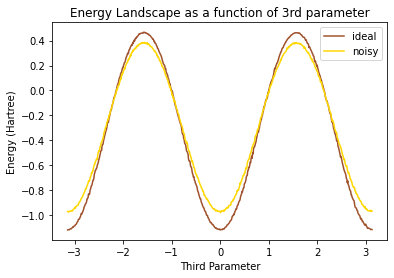

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x = [plot_data[i][0] for i in range(628)]
y1 = [plot_data[i][1] for i in range(628)]
y2 = [plot_data[i][2] for i in range(628)]

a = plt.figure()
plt.plot(x, y1,color = "sienna", label = 'ideal')
plt.plot(x,y2, color = "gold", label = 'noisy')
plt.title("Energy Landscape as a function of 3rd parameter")
plt.xlabel("Third Parameter")
plt.ylabel("Energy (Hartree)")
plt.legend()
plt.show()

a.savefig('Plot(1).png', dpi = 1000)

In [11]:
energies

[[[0.00172129, -0.00182397, -3.141592653589793],
  -1.1188866609189183,
  -0.9702672609189185],
 [[0.00172129, -0.00182397, -3.1315926535897933],
  -1.1165698609189185,
  -0.9755066609189186],
 [[0.00172129, -0.00182397, -3.121592653589793],
  -1.1169548609189186,
  -0.9717278609189185],
 [[0.00172129, -0.00182397, -3.1115926535897933],
  -1.1183960609189183,
  -0.9712132609189185],
 [[0.00172129, -0.00182397, -3.101592653589793],
  -1.1141504609189186,
  -0.9698508609189186],
 [[0.00172129, -0.00182397, -3.0915926535897933],
  -1.1114908609189185,
  -0.9712734609189185],
 [[0.00172129, -0.00182397, -3.081592653589793],
  -1.1097562609189184,
  -0.9669130609189186],
 [[0.00172129, -0.00182397, -3.0715926535897933],
  -1.1102132609189184,
  -0.9669628609189185],
 [[0.00172129, -0.00182397, -3.061592653589793],
  -1.1082072609189182,
  -0.9645894609189185],
 [[0.00172129, -0.00182397, -3.0515926535897933],
  -1.1020636609189183,
  -0.9630242609189185],
 [[0.00172129, -0.00182397, -3.0415

In [12]:
plot_data

[[-3.141592653589793, -1.1188866609189183, -0.9702672609189185],
 [-3.1315926535897933, -1.1165698609189185, -0.9755066609189186],
 [-3.121592653589793, -1.1169548609189186, -0.9717278609189185],
 [-3.1115926535897933, -1.1183960609189183, -0.9712132609189185],
 [-3.101592653589793, -1.1141504609189186, -0.9698508609189186],
 [-3.0915926535897933, -1.1114908609189185, -0.9712734609189185],
 [-3.081592653589793, -1.1097562609189184, -0.9669130609189186],
 [-3.0715926535897933, -1.1102132609189184, -0.9669628609189185],
 [-3.061592653589793, -1.1082072609189182, -0.9645894609189185],
 [-3.0515926535897933, -1.1020636609189183, -0.9630242609189185],
 [-3.041592653589793, -1.0993546609189184, -0.9679550609189184],
 [-3.0315926535897932, -1.0931734609189183, -0.9570460609189185],
 [-3.021592653589793, -1.0954306609189186, -0.9532002609189185],
 [-3.0115926535897932, -1.0883662609189184, -0.9495232609189185],
 [-3.001592653589793, -1.0867602609189184, -0.9452302609189184],
 [-2.9915926535897

In [15]:
int((2*math.pi)/0.01)

628